In [65]:
# Set up libraries, etc.
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import scipy.stats as ss
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
from scipy import stats
from time import time
import sys

PROJECT_DIR = '/home/groups/dpwall/briannac/sequence_based_biomarkers/'


BIOMARKER_FILE =  PROJECT_DIR + 'results/generate_SBBs/yogurt_DECIPHER_person_variant1_unique.npy' #sys.argv[1]
AUTISM_OR_OBESITY = 'autism' #sys.argv[2]
START = 1 #int(sys.argv[3])
STOP = 10 #int(sys.argv[4])
DATA_PVALS_FILE = sys.argv[5]
FD_COUNT_FILE = sys.argv[6]

print('Loading files...')
biomarkers = np.load(BIOMARKER_FILE)
biomarkers = biomarkers[:,((biomarkers>0).mean(axis=0)>=.1)] # Only include biomarkers in >= 10% of population.

if AUTISM_OR_OBESITY=='obesity':
    person_vs_taxa = pd.read_table(PROJECT_DIR + 'data/obese_lean_twins/person_vs_taxa.tsv')
    metadata =  pd.read_table(PROJECT_DIR + 'data/obese_lean_twins/metadata.tsv', index_col=0)
    metadata = metadata.loc[person_vs_taxa.index]
    metadata['phenotype'] = metadata.obesitycat=='Obese'
    permuted_phenos = np.load(PROJECT_DIR + 'intermediate_files/permutation_test/obesity_phenos_permuted.npy').astype(bool)
    phenos = metadata.phenotype
elif AUTISM_OR_OBESITY=='autism':
    person_vs_taxa = pd.read_table(PROJECT_DIR + 'data/yogurt/person_vs_taxa.tsv')
    metadata =  pd.read_table(PROJECT_DIR + 'data/yogurt/metadata.tsv', index_col=0)
    metadata = metadata.loc[person_vs_taxa.index]
    metadata.phenotype = metadata.phenotype=='A'
    phenos = metadata.phenotype
    permuted_phenos = np.load(PROJECT_DIR + 'intermediate_files/permutation_test/autism_phenos_permuted.npy').astype(bool)

else:
    print('ERROR -- need to specify autism or obesity')

data_pvalues = np.loadtxt(DATA_PVALS_FILE)

p_values = [[
    -np.log10(wilcoxon(biomarkers[permuted_pheno, i], biomarkers[~permuted_pheno, i]).pvalue) for permuted_pheno in permuted_phenos[START:min(len(permuted_phenos),STOP)]
] for data_i, i in tqdm.tqdm(enumerate(range(np.shape(biomarkers)[1])))]
fd_counts = [sum([sum(p>=data_p) for p in p_values]) for data_p in sorted(data_pvalues)]
with open(FD_COUNT_FILE, 'w') as f:
    writer = csv.writer(f, delimiter="\t")
    writer.writerow(fd_counts)


Loading files...


In [88]:
# Set up libraries, etc.
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import scipy.stats as ss
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import multipletests
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
from scipy import stats
from time import time
import sys

PROJECT_DIR = '/home/groups/dpwall/briannac/sequence_based_biomarkers/'


BIOMARKER_FILE =  PROJECT_DIR + 'results/generate_SBBs/yogurt_DECIPHER_person_variant1_unique.npy' #sys.argv[1]
AUTISM_OR_OBESITY = 'autism' #sys.argv[2]
DATA_PVALS_FILE = sys.argv[5]
FD_COUNT_FILE = sys.argv[6]

print('Loading files...')
biomarkers = np.load(BIOMARKER_FILE)
biomarkers = biomarkers[:,((biomarkers>0).mean(axis=0)>=.1)] # Only include biomarkers in >= 10% of population.

if AUTISM_OR_OBESITY=='obesity':
    person_vs_taxa = pd.read_table(PROJECT_DIR + 'data/obese_lean_twins/person_vs_taxa.tsv')
    metadata =  pd.read_table(PROJECT_DIR + 'data/obese_lean_twins/metadata.tsv', index_col=0)
    metadata = metadata.loc[person_vs_taxa.index]
    metadata['phenotype'] = metadata.obesitycat=='Obese'
    permuted_phenos = np.load(PROJECT_DIR + 'intermediate_files/permutation_test/obesity_phenos_permuted.npy').astype(bool)
    phenos = metadata.phenotype
elif AUTISM_OR_OBESITY=='autism':
    person_vs_taxa = pd.read_table(PROJECT_DIR + 'data/yogurt/person_vs_taxa.tsv')
    metadata =  pd.read_table(PROJECT_DIR + 'data/yogurt/metadata.tsv', index_col=0)
    metadata = metadata.loc[person_vs_taxa.index]
    metadata.phenotype = metadata.phenotype=='A'
    phenos = metadata.phenotype
    permuted_phenos = np.load(PROJECT_DIR + 'intermediate_files/permutation_test/autism_phenos_permuted.npy').astype(bool)

else:
    print('ERROR -- need to specify autism or obesity')
data_pvalues = [-np.log10(wilcoxon(biomarkers[phenos, i], biomarkers[~phenos, i]).pvalue) for i in range(np.shape(biomarkers)[1])]
np.save_txt(DATA_PVALS_FILE, data_pvalues)

In [90]:
p_values = [[
    -np.log10(wilcoxon(biomarkers[permuted_pheno, i], biomarkers[~permuted_pheno, i]).pvalue) for permuted_pheno in permuted_phenos[START:min(len(permuted_phenos),STOP)]
] for data_i, i in tqdm.tqdm(enumerate(range(np.shape(biomarkers)[1])))]
fd_counts = [sum([sum(p>=data_p) for p in p_values]) for data_p in sorted(data_pvalues)]
with open(FD_COUNT_FILE, 'w') as f:
    writer = csv.writer(f, delimiter="\t")
    writer.writerow(fd_counts)

652it [00:01, 407.98it/s]


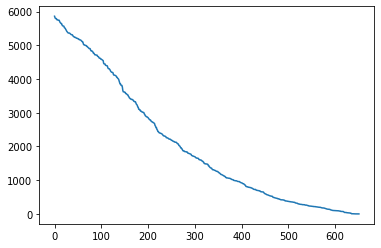

In [92]:
with open(FD_COUNT_FILE, 'w') as f:
    writer = csv.writer(f, delimiter="\t")
    writer.writerow(fd_counts)

In [2]:
t = time()
if AUTISM_OR_OBESITY=='autism':
    print('computing wilcox scores for data...')
    print('computing wilcox scores for permuted data...')
    p_values = [
        [i, -np.log10(wilcoxon(biomarkers[phenos, i], biomarkers[~phenos, i]).pvalue)]  +
        [-np.log10(wilcoxon(biomarkers[permuted_pheno, i], biomarkers[~permuted_pheno, i]).pvalue) for permuted_pheno in permuted_phenos
        ] for data_i, i in tqdm.tqdm(enumerate(range(START,  min(np.shape(biomarkers)[1], STOP))))]
elif AUTISM_OR_OBESITY=='obesity':
    print('computing wilcox scores for data...')
#    wilcox_scores_data = [mannwhitneyu(biomarkers[phenos, i], 
#                             biomarkers[~phenos, i]).pvalue  for i in range(START,  min(np.shape(biomarkers)[1], #STOP))]
    print('computing wilcox scores for permuted data...')
    p_values = [
        [i, -np.log10(mannuwhitney(biomarkers[phenos, i], biomarkers[~phenos, i]).pvalue)]  +
        [-np.log10(mannuwhitney(biomarkers[permuted_pheno, i], biomarkers[~permuted_pheno, i]).pvalue) for permuted_pheno in permuted_phenos
        ] for data_i, i in tqdm.tqdm(enumerate(range(START,  min(np.shape(biomarkers)[1], STOP))))]

print('Writing to %s_%i_%i.txt' % (OUT_PREFIX, START, STOP))
np.savetxt('%s_%i_%i.txt' % (OUT_PREFIX, START, STOP), p_values, fmt='%.3f')
print(time()-t)

In [4]:
# Read list of biomarkers.
print(order, study, msa_method)
biomarkers = pd.read_csv('/home/groups/dpwall/briannac/sequence_based_biomarkers/results/generate_SBBs/' + study  + 
                         '_'  + str(msa_method) +  '_biomarkers' + str(order) + '.txt', sep='\t', header=None)
biomarkers = biomarkers.drop(list(range(order)), axis =1)
biomarkers.columns = [i for i in range(order)]

# Read taxa vs variants.
taxa_vs_variants = pd.read_csv('/home/groups/dpwall/briannac/sequence_based_biomarkers/data/' + study + '/' + str(msa_method) + '_taxa_vs_variants_unique.tsv', sep='\t')
taxa_vs_variants.columns = ['ASV'] + [i for i in range(len(taxa_vs_variants.columns)-1)]

1 yogurt DECIPHER


In [6]:
biomarkers

,0
0,0
1,2
2,3
3,4
4,5
...,...
913,914
914,915
915,916
916,917


In [5]:
taxa_vs_variants

,ASV,0,1,2,3,4,5,6,7,8,...,909,910,911,912,913,914,915,916,917,918
0,ASV_1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,0,0,0
1,ASV_2,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,0,0
2,ASV_3,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,0,0
3,ASV_4,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,0,0
4,ASV_5,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5020,ASV_5261,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,0,0
5021,ASV_5262,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,0,0
5022,ASV_5263,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,0,0
5023,ASV_5264,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,0,0,0


In [10]:
person_variant = np.array(np.load('/home/groups/dpwall/briannac/sequence_based_biomarkers/results/generate_SBBs/' + study  + 
                                  '_'  + str(msa_method) +  '_person_variant' + str(order) + '_condensed.npy'))
np.shape(person_variant)

(218, 918)

In [17]:
person_variant, unique_idx = np.unique(person_variant, axis=1, return_index=True)
len(unique_idx)

918

In [1]:
#biomarker_seqs = set()
#biomarkers_seqs_list = []
#unique_idx = [] 

#for i,b in enumerate(biomarkers.iterrows()):
#    if (i%100000)==0:
#        print(i/len(biomarkers), " way done...")
#    biomarker_seq = tuple(sum([taxa_vs_variants[b[1][order_i]].values for order_i in range(order)])==order)
#    if biomarker_seq not in biomarker_seqs:
#        biomarker_seqs = biomarker_seqs.union(set([biomarker_seq]))
#        biomarkers_seqs_list.append(biomarker_seq)
#        unique_idx = unique_idx + [i]
#np.save('results/person_biomarker/' + study  + 
#        '_'  + str(msa_method) +  '_biomarker_seq' + str(order) + '.npy', biomarkers_seqs_list)
#print("step done... deleting biomarker_seq")
#del biomarker_seqs
#del biomarkers_seqs_list

person_variant = np.array(np.load('results/generate_SBBs/' + study  + 
                                  '_'  + str(msa_method) +  '_person_variant' + str(order) + '_condensed.npy'))
person_variant, unique_idx = np.unique(person_variant, axis=1, return_index=True)
print(len(unique_idx), " unique markers")
print('here2')
np.save('results/generate_SBBs/' + study  + 
        '_'  + str(msa_method) +  '_person_variant' + str(order) + '_unique.npy', person_variant)
del person_variant

biomarkers = biomarkers.iloc[unique_idx]
biomarkers.to_csv('results/generate_SBBs/' + study  + 
                                               '_'  + str(msa_method) +  '_biomarkers' + str(order) + '_unique.npy', sep='\t')
print("step done... deleting biomarkers")
del biomarkers
print('here')
person_variant = np.array(np.load('results/generate_SBBs/' + study  + 
                                  '_'  + str(msa_method) +  '_person_variant' + str(order) + '_condensed.npy'))
print('here1')
print(len(unique_idx), " unique combos")
print('done, success!')

In [29]:
from glob import glob
for f in glob('/home/groups/dpwall/briannac/sequence_based_biomarkers/results/generate_SBBs/*person_variant*_unique.npy'):
    a = np.load(f, allow_pickle=True) 
    print(f, np.shape(a))

/home/groups/dpwall/briannac/sequence_based_biomarkers/results/generate_SBBs/diabetes_150_DECIPHER_person_variant3_unique.npy (114, 616749)
/home/groups/dpwall/briannac/sequence_based_biomarkers/results/generate_SBBs/obese_lean_twins_DECIPHER_person_variant1_unique.npy (154, 405)
/home/groups/dpwall/briannac/sequence_based_biomarkers/results/generate_SBBs/yogurt_DECIPHER_person_variant2_unique.npy (218, 126119)
/home/groups/dpwall/briannac/sequence_based_biomarkers/results/generate_SBBs/diabetes_150_DECIPHER_person_variant1_unique.npy (114, 521)
/home/groups/dpwall/briannac/sequence_based_biomarkers/results/generate_SBBs/obese_lean_twins_DECIPHER_person_variant2_unique.npy (154, 22651)
/home/groups/dpwall/briannac/sequence_based_biomarkers/results/generate_SBBs/diabetes_150_DECIPHER_person_variant2_unique.npy (114, 32463)
/home/groups/dpwall/briannac/sequence_based_biomarkers/results/generate_SBBs/yogurt_DECIPHER_person_variant3_unique.npy (218, 8780784)
/home/groups/dpwall/briannac/se

In [49]:
a = np.load('/home/groups/dpwall/briannac/sequence_based_biomarkers/results/generate_SBBs/yogurt_DECIPHER_person_variant2_unique.npy', allow_pickle=True)

In [50]:
test = pd.DataFrame(a).transpose()

In [51]:
sum(test.sum(axis=1)==0)

0

In [52]:
test_dup = test.duplicated()

In [63]:
test.max().max()

1.0000000000000016

In [ ]:
from glob import glob
for f in glob('/home/groups/dpwall/briannac/sequence_based_biomarkers/results/generate_SBBs/*person_variant*_unique.npy'):
    a = np.load(f, allow_pickle=True) 
    print(f, np.shape(a))